In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

In [3]:
covid_data = pd.read_csv("owid-covid-data.csv")

In [18]:
%%capture
covid_data.shape

In [19]:
%%capture
covid_data.info()

In [17]:
%%capture
covid_data.columns

In [8]:
country = ['location', 'date']

total_deaths = ['total_deaths', 'total_deaths_per_million']

new_deaths = ['new_deaths_smoothed', 'new_deaths_smoothed_per_million']

vaccinations = ['total_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 
                'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 
                'new_vaccinations_smoothed_per_million']

factors = ['stringency_index','population', 'population_density', 'median_age', 'aged_65_older','aged_70_older', 
           'gdp_per_capita', 'extreme_poverty','cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
           'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand','life_expectancy', 
           'human_development_index', 'excess_mortality']

In [9]:
covid_sub = covid_data[country + total_deaths + new_deaths + vaccinations + factors]

In [10]:
missing_new_deaths = covid_sub['new_deaths_smoothed'].isna()
covid_sub = covid_sub.loc[~missing_new_deaths,:]

In [11]:
missing_total_deaths = covid_sub['total_deaths'].isna()
covid_sub = covid_sub.loc[~missing_total_deaths]

In [12]:
continents = ['Europe', 'South America', 'North America', 'Asia', 'Africa', 'Oceania']
continent_data = covid_sub.loc[covid_sub['location'].isin(continents),:]
continent_totals = continent_data[['location','total_deaths']].groupby('location').max()

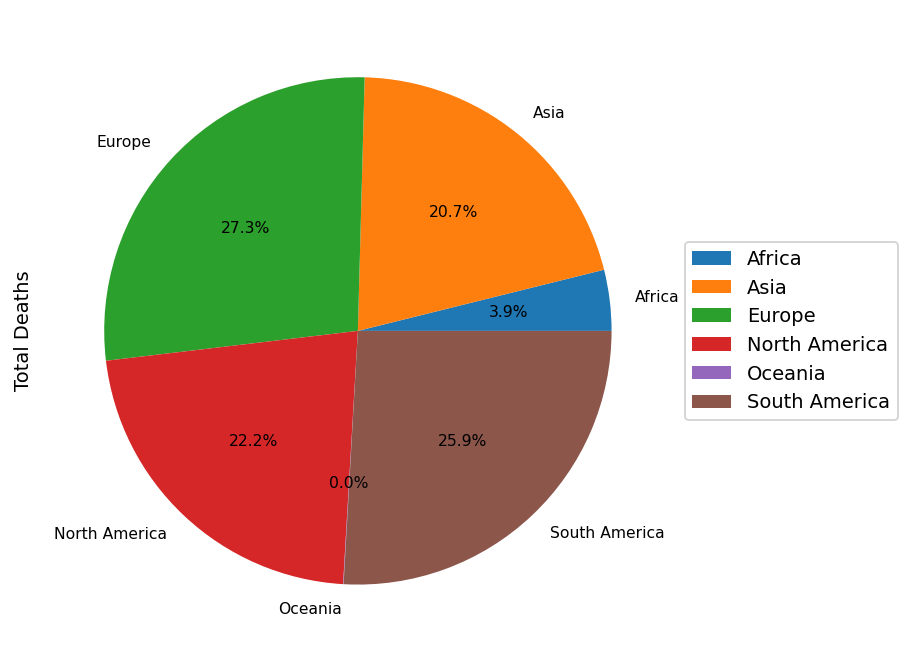

In [14]:
plt.rcParams["figure.dpi"] = 140

continent_totals.plot(kind = 'pie', x = 'location', y = 'total_deaths', figsize = (6,6), autopct='%1.1f%%', fontsize = 8)

plt.ylabel('Total Deaths')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Text(0.5, 1.0, 'Total deaths for each continent')

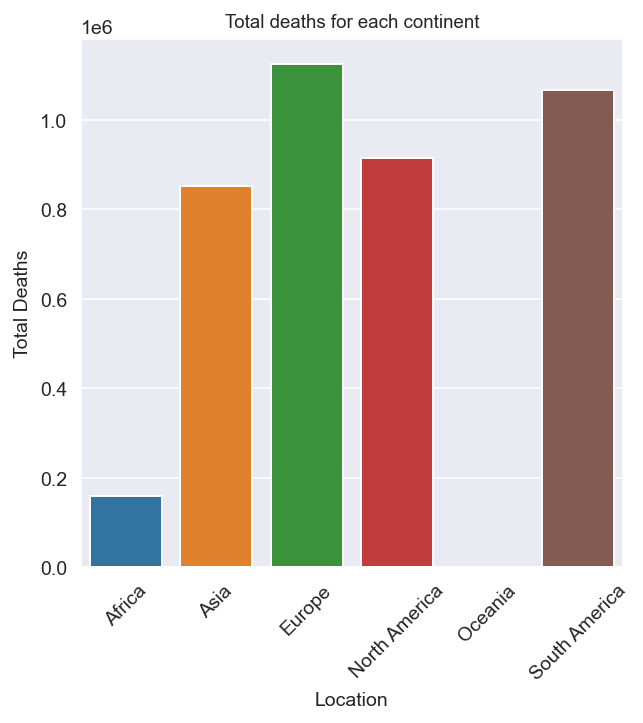

In [15]:
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")

sns.barplot(x = continent_totals.index, y = continent_totals["total_deaths"])
sns.set(font_scale = 0.8)

plt.xticks(rotation = 45)
plt.ylabel('Total Deaths')
plt.xlabel('Location')
plt.title('Total deaths for each continent')

Text(0.5, 1.0, 'Total deaths over time')

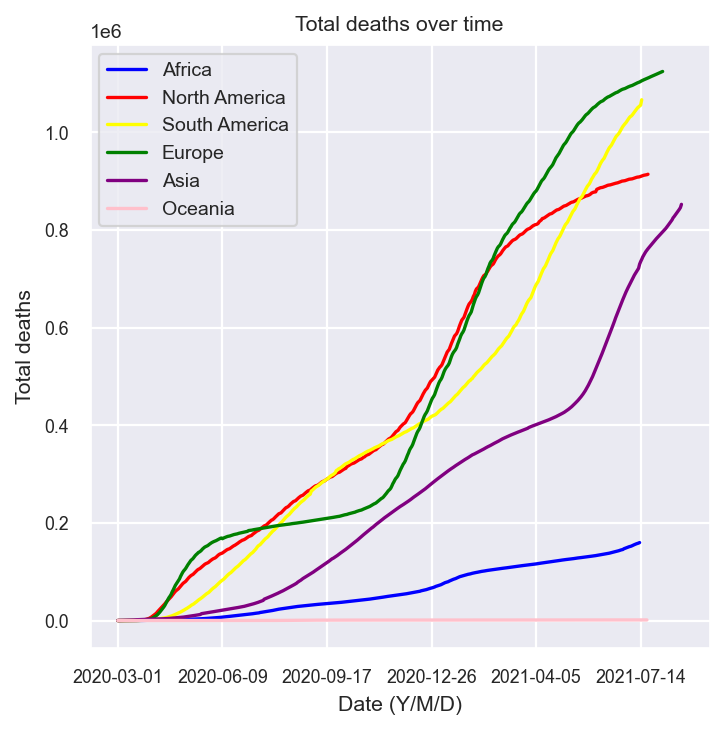

In [16]:
plt.rcParams["figure.dpi"] = 160

a = continent_data.loc[continent_data['location'] == 'Africa',['date','total_deaths']].plot(x = 'date', y = 'total_deaths', figsize = (5,5), fontsize = 8, c = 'blue', label = 'Africa')
continent_data.loc[continent_data['location'] == 'North America', ['date','total_deaths']].plot(x = 'date', y = 'total_deaths', ax = a, c = 'red', label = 'North America')
continent_data.loc[continent_data['location'] == 'South America', ['date','total_deaths']].plot(x = 'date', y = 'total_deaths', ax = a, c = 'yellow', label = 'South America')
continent_data.loc[continent_data['location'] == 'Europe', ['date','total_deaths']].plot(x = 'date', y = 'total_deaths', ax = a, c = 'green', label = 'Europe')
continent_data.loc[continent_data['location'] == 'Asia', ['date','total_deaths']].plot(x = 'date', y = 'total_deaths', ax = a, c = 'purple', label = 'Asia')
continent_data.loc[continent_data['location'] == 'Oceania', ['date','total_deaths']].plot(x = 'date', y = 'total_deaths', ax = a, c = 'pink', label = 'Oceania')

plt.xlabel('Date (Y/M/D)')
plt.ylabel('Total deaths')
plt.title('Total deaths over time')